# Project - Applied Statistics

**Submitted by:**
- Kovendhan V
- PGP-AIML-Online-Jun20B-Group4

## Problem Statement:
**Data Description:**

The data at hand contains medical costs of people characterized by certain attributes.

**Domain:**
Healthcare

**Context:**
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information:**
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance.

**Learning Outcomes:**
- Exploratory Data Analysis
- Practicing statistics using Python
- Hypothesis testing

**Objective:**
We want to see if we can dive deep into this data to find some valuable insights.

**Steps and tasks:**
1. Import the necessary libraries (2 marks)
2. Read the data as a data frame (2 marks)
3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)
a. Shape of the data (2 marks)
b. Data type of each attribute (2 marks)
c. Checking the presence of missing values (3 marks)
d. 5 point summary of numerical attributes (3 marks)
e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)
f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
h. Distribution of categorical columns (include children) (4 marks)
i. Pair plot that includes all the columns of the data frame (4 marks)
4. Answer the following questions with statistical evidence (28 marks)
a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)
b. Does bmi of males differ significantly from that of females? (7 marks)
c. Is the proportion of smokers significantly different in different genders? (7 marks)
d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

Datasource: insurance.csv

## 1. Importing the necessary Python packages

In [1]:
#Numerical & Data Analysis packages
import numpy as np
import pandas as pd

#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

#Categorical variables to Numeric variables
from sklearn.preprocessing import LabelEncoder

#Statistical Tests
from scipy.stats import ttest_1samp, ttest_ind, levene, shapiro, skewtest
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway #Anova
from scipy.stats import norm


## 2. Loading the Dataset in Pandas Dataframe

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
# Take a look at the top 5 records
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Exploratory Data Analysis

### Checking the Shape and Data Types

In [4]:
#Check Shape of the data
print("Number of rows in the dataset    : ", insurance.shape[0])
print("Number of columns in the dataset : ", insurance.shape[1])

Number of rows in the dataset    :  1338
Number of columns in the dataset :  7


In [5]:
#Check the column names and corresponding data types of data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking the number of data types
print("Number of Data types present in the data are :")
insurance.dtypes.value_counts()

Number of Data types present in the data are :


object     3
float64    2
int64      2
dtype: int64

There are 3 Categorical variables and 4 Numeric variables in the data set.

### Missing Values Analysis

In [7]:
#Checking for missing values
print("Columnwise Number of missing values :")
print(insurance.isna().sum())
print("Total number of missing values in the data set : ", insurance.isna().sum().sum())

Columnwise Number of missing values :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Total number of missing values in the data set :  0


In [8]:
#Checking the unique values for each of the variables (except for charges)
#This will give an idea whether there are any inconsistent/unformatted (but non-null) record is present in the dataset that needs further formatting and cleaning
columns = ['age', 'sex', 'children', 'smoker', 'region']

for i in columns:
    print(i)
    print(insurance[i].unique())
    print("\n")

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


sex
['female' 'male']


children
[0 1 3 2 5 4]


smoker
['yes' 'no']


region
['southwest' 'southeast' 'northwest' 'northeast']




**Inferences:**
1. Dataset has a total of 1338 rows and 7 columns. All the column names are meaningful, therefore column renaming is not required.
2. There are no missing values observed - all the columns are having 1338 records. No formatting, data cleaning is required. 
3. There are three Categorical (Qualitative) variables namely : i. sex, ii. smoker and iii. region
4. There are 4 numeric (Quantitative) variables namely : i. age, ii. bmi, iii. children & iv. charges
5. Out of the 4 Quantitative variables, "age" and "children" are discrete variables; "bmi" and "charges" are continuous variables. 
6. There are no inconsistent records observed in the data set. 

### Statistical Summary of the dataset

In [9]:
#Five number summary of the numeric variables : min, 25%, median, 75%, max
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
#Mean
insurance.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [11]:
#Median
insurance.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [12]:
#Mode
insurance.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [13]:
#Range
insurance[["age", "bmi", "charges"]].max() - insurance[["age", "bmi", "charges"]].min()

age           46.00000
bmi           37.17000
charges    62648.55411
dtype: float64

In [14]:
#Inter Quartile Range : IQR = Quantile(75%) - Quantile(25%)
insurance.quantile(0.75) - insurance.quantile(0.25)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

**Inferences :**
- We can observe that the mean of "age", "bmi" are similar to the corresponding median values. 
- Specifically, the "bmi" variable with a median of 30.40, almost close to mean value of 30.66 shows approximately normal distribution.
- Similar to "bmi", "age" with a median of 39.00 and mean of 39.20 shows approximately normal distribution characteristics. 
- In contrast, the "charges" variable with a minimum of 1121.87 maximum of 63770.42 and a median of 9386.16 --> shows right skewed distribution with a long tail. Also mean value 13279.12 is > median value 9386.16 (well defined positive skewness)

## Univariate Analysis

In this section let us look at the variables in isolation - Univariate Analysis. First we will see the Quantitative Variables, one by one followed by Categorical Variables. 
For each variable, we will check the below:
1. Distribution
2. Skewness Check
3. Outliers Check
4. Summary Inference for the variable based on above checks

### Quantitative (numeric) variables

### Distribution of Numeric Variables

#### ***Distribution of "Age"***

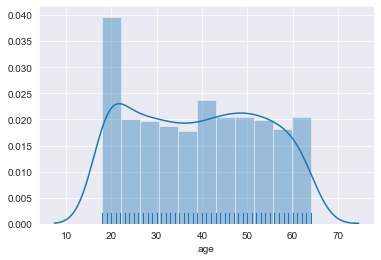

In [15]:
sns.distplot(insurance["age"], rug = True);

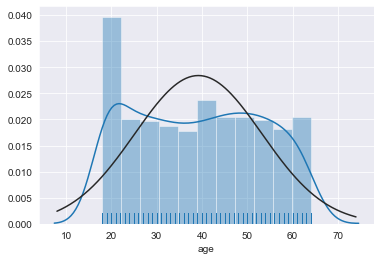

In [16]:
#Let us fit the Normal Distribution curve to do a qualitative check for the normality
sns.distplot(insurance["age"], rug = True, fit = norm);

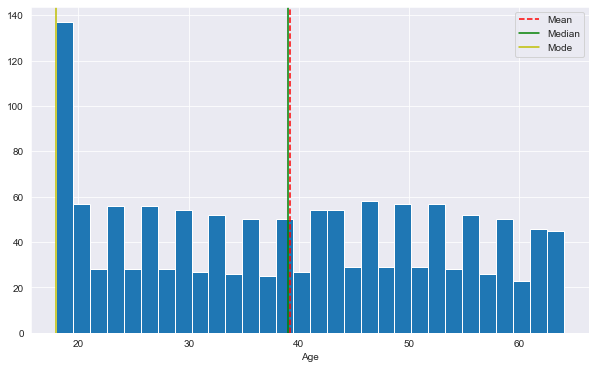

In [17]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(insurance["age"].mean(), color='r', linestyle='--')
plt.axvline(insurance["age"].median(), color='g', linestyle='-')
plt.axvline(insurance["age"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':insurance["age"].mean(),'Median':insurance["age"].median(),'Mode':insurance["age"].mode()[0]})
plt.xlabel("Age")
plt.hist(insurance["age"], bins = 30)
plt.show()

#### ***Distirbution of "BMI"***

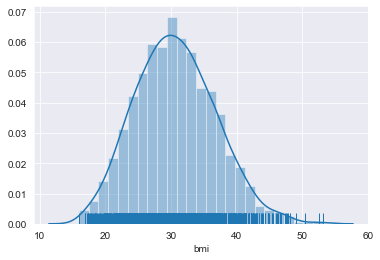

In [18]:
sns.distplot(insurance["bmi"], rug = True);

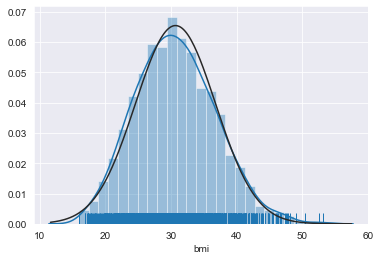

In [19]:
#Let us fit the Normal Distribution curve to do a qualitative check for the normality
sns.distplot(insurance["bmi"], rug = True, fit = norm);

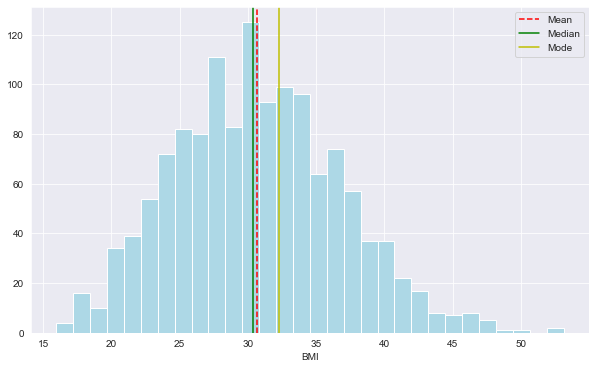

In [20]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(insurance["bmi"].mean(), color='r', linestyle='--')
plt.axvline(insurance["bmi"].median(), color='g', linestyle='-')
plt.axvline(insurance["bmi"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':insurance["bmi"].mean(),'Median':insurance["bmi"].median(),'Mode':insurance["bmi"].mode()[0]})
plt.xlabel("BMI")
plt.hist(insurance["bmi"], bins = 30, color="lightblue")
plt.show()

***Distribution of "Charges"***

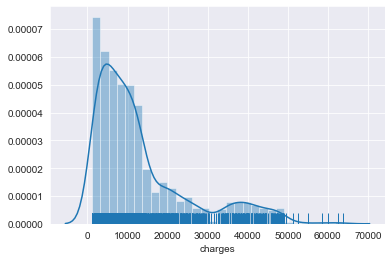

In [21]:
sns.distplot(insurance["charges"], rug = True);

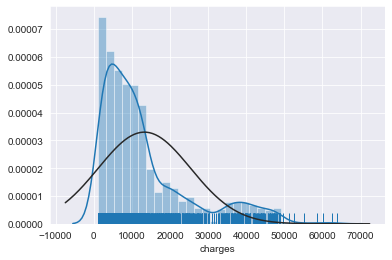

In [22]:
#Let us fit the Normal Distribution curve to do a qualitative check for the normality
sns.distplot(insurance["charges"], rug = True, fit = norm);

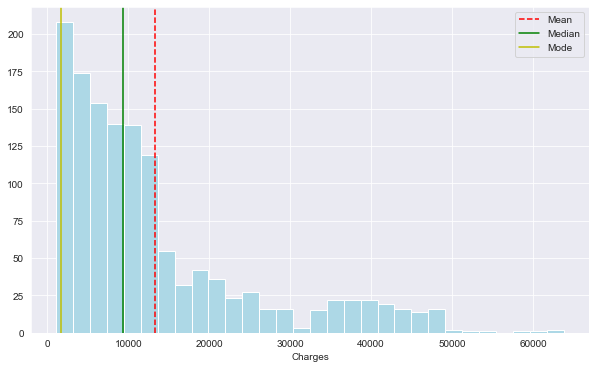

In [23]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(insurance["charges"].mean(), color='r', linestyle='--')
plt.axvline(insurance["charges"].median(), color='g', linestyle='-')
plt.axvline(insurance["charges"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':insurance["charges"].mean(),'Median':insurance["charges"].median(),'Mode':insurance["charges"].mode()[0]})
plt.xlabel("Charges")
plt.hist(insurance["charges"], bins = 30, color = "lightblue")
plt.show()

***Inference from Distribution of Numeric Variables:***
1. Distribution of numerical variables such as 'age' and 'bmi' are indicating fairly approximated Normal Distribution. 
2. However. 'charges' variable is not normally distributed with a strong positive skewness. 

### Skewness Analysis for Numeric Variables

- From the distribution of variables, we can assume that "Age" and "BMI" variables are fairly normally distributed, which means we expect their corresponding Skew values to be negligent. 
- We also expect positive skew value for "Charges" due to the presence of long-tail. 

Let us reconfirm our observations with numerical proof.

#### ***Measure of Skewness for "Age"***


In [24]:
print("Skewness of Age     : ", insurance["age"].skew().round(4))

#Generic Skewness Check
if insurance["age"].mean() > insurance["age"].median():
  print("Age variable is positively (right) skewed")
elif insurance["age"].mean() < insurance["age"].median():
  print("Age variable is negatively (left) skewed")

Skewness of Age     :  0.0557
Age variable is positively (right) skewed


**Inference:** 
From skew() values, "Age" variable has skew on the positive side, still it is very neglibible at 0.0557 and we can infer that "Age" variable is ***approximately normally distributed***. 


***Measure of Skewness for "BMI"***

In [25]:
print("Skewness of BMI     : ", insurance["bmi"].skew().round(4))

#Generic Skewness Check
if insurance["bmi"].mean() > insurance["bmi"].median():
  print("BMI variable is positively (right) skewed")
elif insurance["bmi"].mean() < insurance["bmi"].median():
  print("BMI variable is negatively (left) skewed")

Skewness of BMI     :  0.284
BMI variable is positively (right) skewed


**Inference:** "BMI" variable has skew on the positive side though very minimal with skewness of 0.284 and we can infer that the variable is ***approximately normally distributed***.

***Measure of Skewness for "Charges"***

In [26]:
print("Skewness of Charges     : ", insurance["charges"].skew().round(4))

#Generic Skewness Check
if insurance["charges"].mean() > insurance["charges"].median():
  print("Charges variable is positively (right) skewed")
elif insurance["charges"].mean() < insurance["charges"].median():
  print("Charges variable is negatively (left) skewed")

Skewness of Charges     :  1.5159
Charges variable is positively (right) skewed


**Inference:** "Charges" variable has strong skew on the positive side with skewness of 1.5159.

### Outliers Analysis for Numeric Variables

Let us use Box Plots (1.5 x IQR) for detecting the Outliers. (one of the methods). 

***Outliers Detection for "Age"***

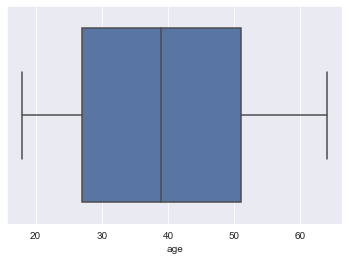

In [27]:
sns.boxplot("age", data = insurance, palette = "deep");

**Inference:** 
"Age" variable has no outliers observed (i.e within 1.5 x IQR as the whiskers for minimum and maximum thresholds)

***Outliers Detection for "BMI"***

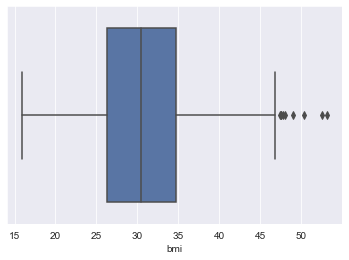

In [28]:
sns.boxplot("bmi", data = insurance, palette = "deep");

**Inference:** 
There are visible outliers for "BMI" variable beyond the maximum whisker of IQR x 1.5 distance. 
Let us try to identify the outlier values using IQR method.

In [29]:
Q1 = insurance["bmi"].quantile(0.25)
Q3 = insurance["bmi"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of BMI variable : ", IQR)

bmi_outliers = np.where((insurance["bmi"] < (Q1 - 1.5 * IQR)) | (insurance["bmi"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for BMI are : ",bmi_outliers[0])
print("Number of outliers for BMI are :", len(bmi_outliers[0]))
print("Percentage of outliers for BMI are : ", round((len(bmi_outliers[0]) / len(insurance["charges"]) * 100),2), "%")

Inter Quartile Range of BMI variable :  8.3975
Outliers beyond 1.5 x IQR for BMI are :  [ 116  286  401  543  847  860 1047 1088 1317]
Number of outliers for BMI are : 9
Percentage of outliers for BMI are :  0.67 %


***Outliers Detection for "Charges"***

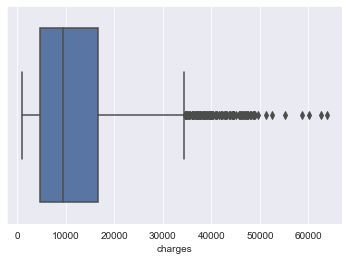

In [30]:
sns.boxplot("charges", data = insurance, palette = "deep");

**Inference:** "Charges" variable has a long-tail distribution with visible outliers for "Charges" variable beyond the maximum whisker of IQR x 1.5 distance. Let us try to identify the outlier values using IQR method.

In [31]:
Q1 = insurance["charges"].quantile(0.25)
Q3 = insurance["charges"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of Charges variable : ", IQR)

charges_outliers = np.where((insurance["charges"] < (Q1 - 1.5 * IQR)) | (insurance["charges"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for Charges are : ",charges_outliers[0])
print("\n")
print("Number of outliers for Charges are : ", len(charges_outliers[0]))
print("Percentage of outliers for Charges are : ", round((len(charges_outliers[0]) / len(insurance["charges"]) * 100),2), "%")

Inter Quartile Range of Charges variable :  11899.625365
Outliers beyond 1.5 x IQR for Charges are :  [  14   19   23   29   30   34   38   39   49   53   55   82   84   86
   94  109  123  146  158  161  175  185  203  223  240  242  251  252
  254  256  263  265  271  281  288  292  298  312  314  322  327  328
  330  338  373  377  381  420  421  422  441  476  488  500  524  530
  543  549  558  569  577  587  609  615  621  623  629  665  667  668
  674  677  682  689  697  706  725  736  738  739  742  759  803  819
  826  828  842  845  850  852  856  860  883  893  901  917  947  951
  953  956  958 1012 1021 1022 1031 1036 1037 1047 1049 1062 1070 1078
 1090 1096 1111 1117 1118 1122 1124 1139 1146 1152 1156 1186 1206 1207
 1218 1230 1240 1241 1249 1284 1288 1291 1300 1301 1303 1313 1323]


Number of outliers for Charges are :  139
Percentage of outliers for Charges are :  10.39 %


**Inference:** Around 1/10th of the total values of Charges are in the long-tail. 

### Qualitative (Categorical) variables

#### Sex

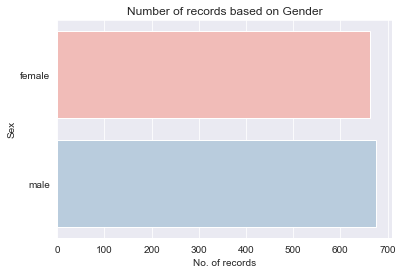

In [32]:
sns.countplot(y = "sex", data = insurance, palette = "Pastel1")
plt.ylabel("Sex")
plt.xlabel("No. of records")
plt.title("Number of records based on Gender")
plt.show()

**Inference:**
Given data set has almost equal distribution in terms of gender (Male/Female)

#### Children

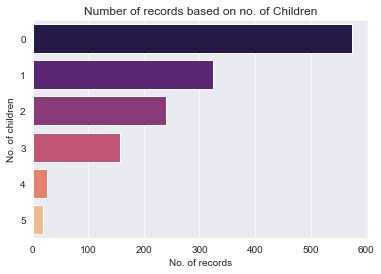

In [33]:
sns.countplot(y = "children", data = insurance, palette = "magma")
plt.ylabel("No. of children")
plt.xlabel("No. of records")
plt.title("Number of records based on no. of Children")
plt.show()

**Inference:** This chart shows the number of children/dependents of the insurance contractors. We can observe that majority of the customers has no children". Very less number of customers have more than 3 children.  

#### Smoker

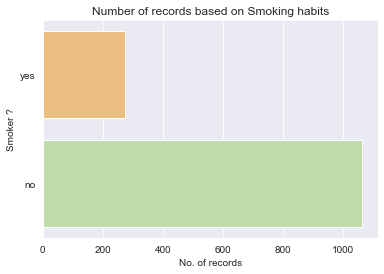

In [34]:
sns.countplot(y = "smoker", data = insurance, palette = "Spectral")
plt.ylabel("Smoker ?")
plt.xlabel("No. of records")
plt.title("Number of records based on Smoking habits")
plt.show()

In [35]:
insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [36]:
print("Ratio of non-smokers is ", round(insurance["smoker"].value_counts()[0] / insurance["smoker"].value_counts()[1]), "times as that of smokers")

Ratio of non-smokers is  4.0 times as that of smokers


**Inference:**
- Majority of the customers are from non-smoking population.
- Non-smokers : Smokers is in the ratio of 4:1

#### Region

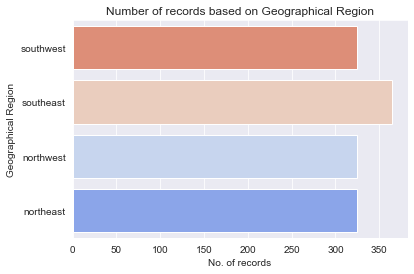

In [37]:
sns.countplot(y = "region", data = insurance, palette = "coolwarm_r")
plt.ylabel("Geographical Region")
plt.xlabel("No. of records")
plt.title("Number of records based on Geographical Region")
plt.show()

**Inference:** "Southeast" region has the most number of customers, with all other three regions showing equal distribution of customers. 

### Multivariate Analysis

In [38]:
#Let us try to include the Categorical variables also in the pair plot by applying Label Encoding.

#taking a copy
insurance_encoded = insurance.copy(deep = True)

#Converting the categorical variable values into numerical values for analysis
insurance_encoded.loc[:,["sex","smoker","region"]] = insurance_encoded.loc[:,["sex","smoker","region"]].apply(LabelEncoder().fit_transform)

insurance_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Figure size 1152x1152 with 0 Axes>

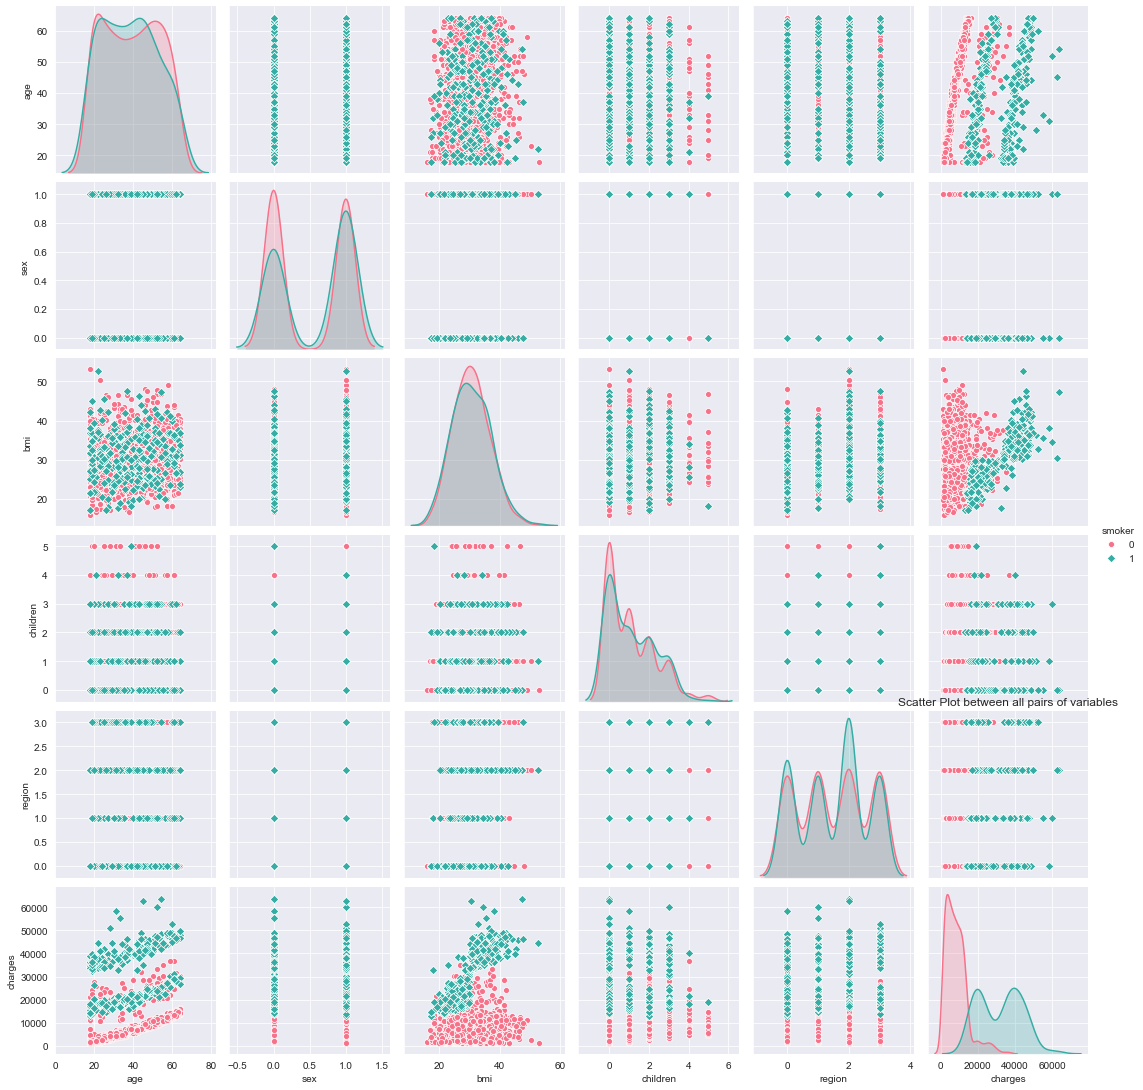

In [39]:
plt.figure(figsize = (16,16))
sns.pairplot(insurance_encoded, kind = "scatter", hue = "smoker", palette = "husl", markers=["o", "D"])
plt.title("Scatter Plot between all pairs of variables")
plt.show()

<Figure size 1152x1152 with 0 Axes>

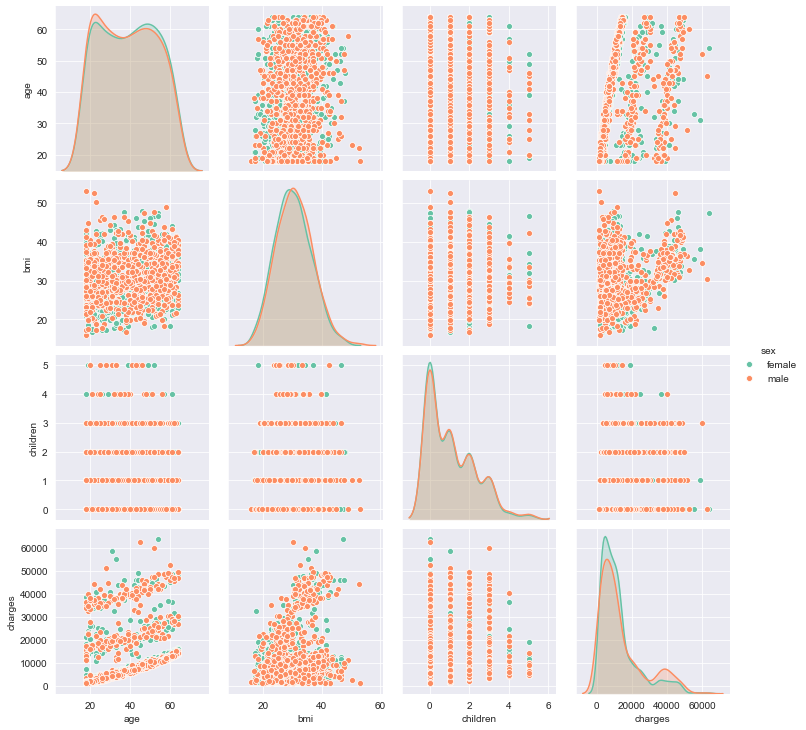

In [40]:
plt.figure(figsize = (16,16))
sns.pairplot(insurance, kind = "scatter", hue = "sex", palette = "Set2")
plt.show()

<Figure size 1152x1152 with 0 Axes>

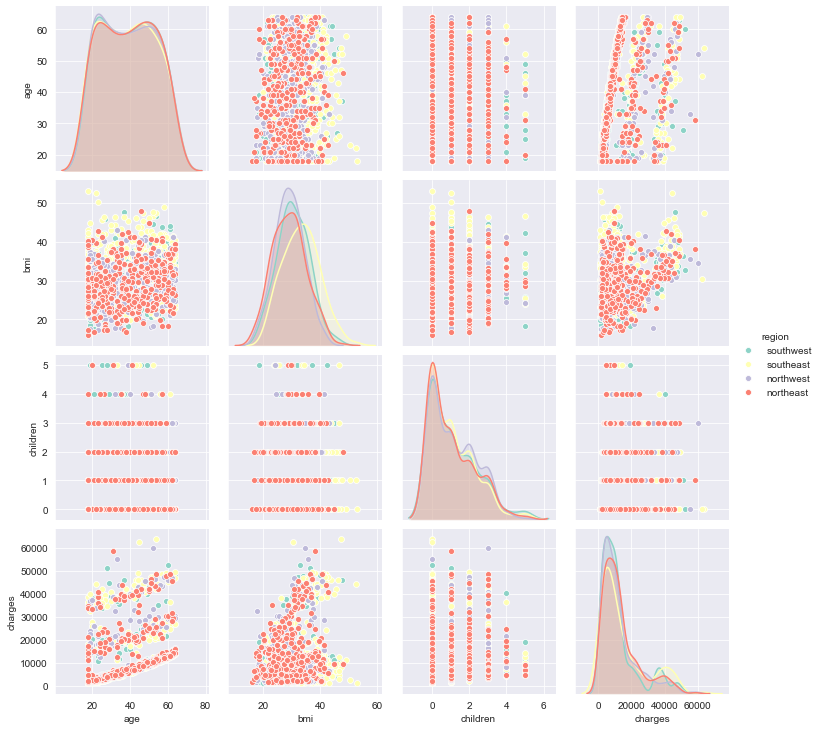

In [41]:
plt.figure(figsize = (16,16))
sns.pairplot(insurance, kind = "scatter", hue = "region", palette = "Set3")
plt.show()

**Inference:**
Let us focus only the encoded Categorical variables and we can observe that multiple Gaussians are present in the data set, atleast in terms of Smoking/Non-smoking and Age (Elders vs Young population). This will be validated with further Hypothesis testing. 
Also, Smokers have higher Charges compared to Non-Smokers. Also, Charges tend to increase with increase in age. There isn't significant difference in the distribution of Region and Sex. 

<Figure size 1008x576 with 0 Axes>

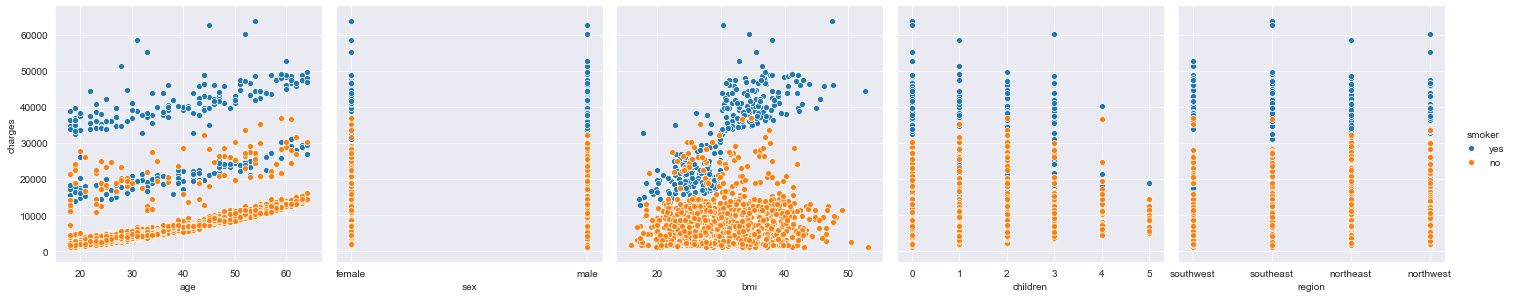

In [68]:
plt.figure(figsize=(14,8))
sns.pairplot(insurance, x_vars=['age','sex', 'bmi', 'children', 'region'], y_vars='charges', hue = "smoker", height=4, aspect=1)
plt.show()

Overall, we can see that smokers are charged on the higher side when compared to non-smokers. 

<Figure size 1008x576 with 0 Axes>

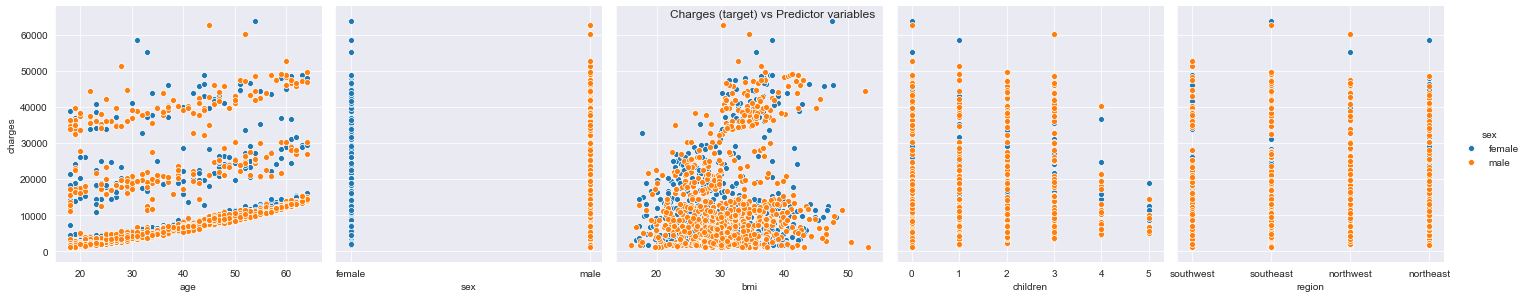

In [43]:
plt.figure(figsize=(14,8))
sns.pairplot(insurance, x_vars=['age','sex', 'bmi', 'children', 'region'], y_vars='charges', hue = "sex", height=4, aspect=1)
plt.suptitle("Charges (target) vs Predictor variables")
plt.show()

There isn't significant difference observed across Men and Women population from the scatter plot. 

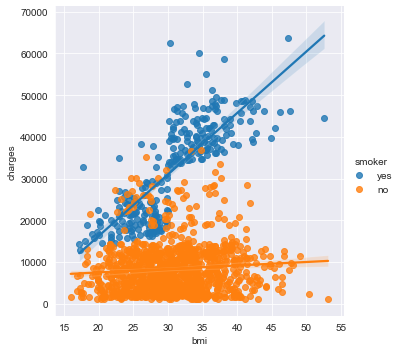

In [44]:
sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = insurance);

Significant difference observed in BMI values vs Charges for Smoking vs Non-smoking population.

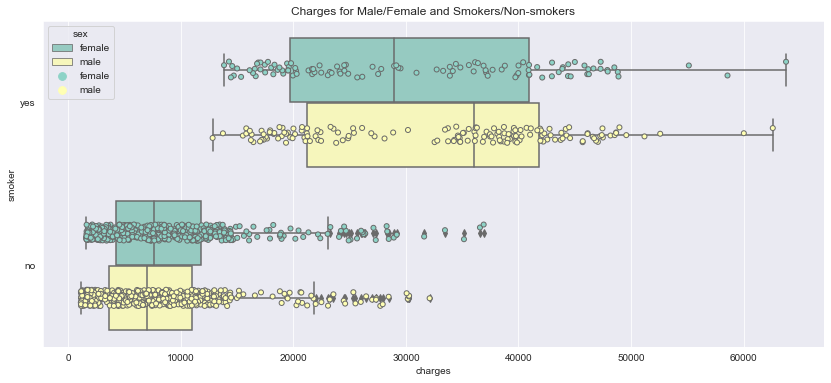

In [45]:
# Let us visualize Charges with two categorical variables "Smokers" and "Sex"using combination of Box Plots and Strip Plots

fig = plt.figure(figsize = (14, 6))
ax = sns.boxplot(y = "smoker", x = "charges", hue = "sex", palette = "Set3", data = insurance)
ax = sns.stripplot(y = "smoker", x = "charges", hue = "sex", palette = "Set3", data = insurance, jitter = True, dodge = True, linewidth = 1)
plt.title("Charges for Male/Female and Smokers/Non-smokers")
plt.show()

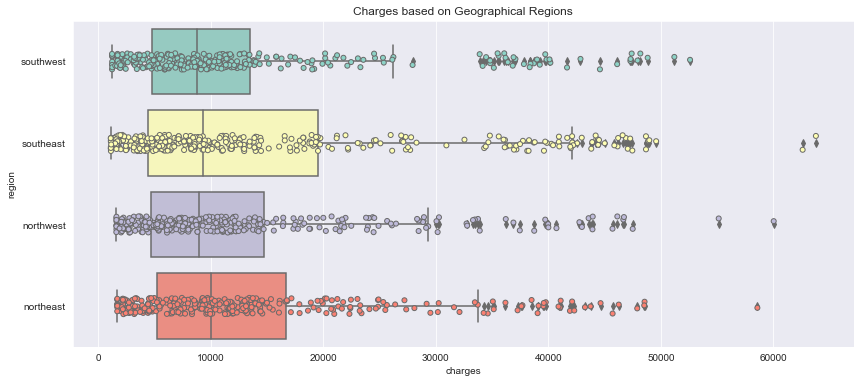

In [46]:
# Let us visualize "Charges" with "Region" using combination of Box Plots and Strip Plots

fig = plt.figure(figsize = (14, 6))
ax = sns.boxplot(y = "region", x = "charges", palette = "Set3", data = insurance)
ax = sns.stripplot(y = "region", x = "charges", palette = "Set3", data = insurance, jitter = True, dodge = True, linewidth = 1)
plt.title("Charges based on Geographical Regions")
plt.show()

Charges across geographical regions remain random and almost similar. We can see there are clusters of outliers for Southwest. 

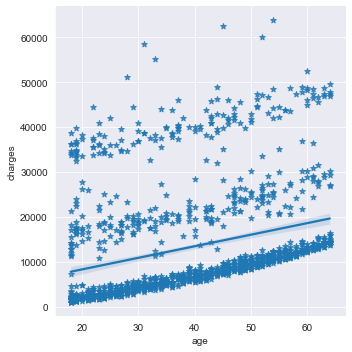

In [47]:
sns.lmplot(x = "age", y = "charges", data = insurance, markers = "*");

Overall, we can observe that Charges are higher for elder people (as age tends to go up, charges are on higher side in given data)

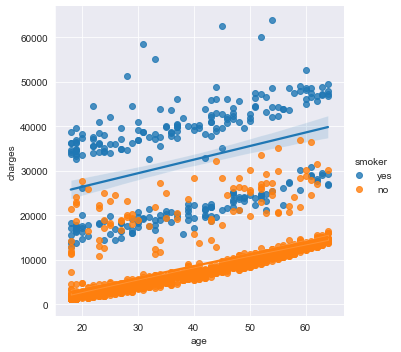

In [48]:
sns.lmplot(x = "age", y = "charges", hue = "smoker", data = insurance);

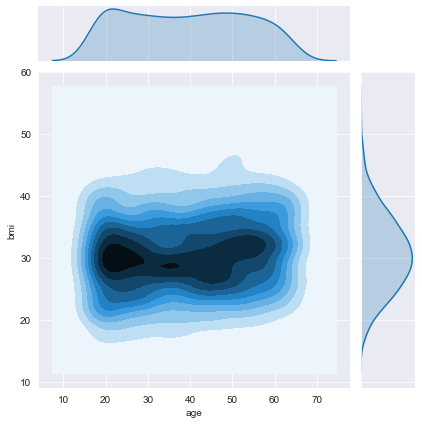

In [49]:
sns.jointplot(x = "age", y = "bmi", kind = "kde", data = insurance);

Majority of the people in age bracket 20-25 have dense BMI distribution in the range of ~ 28-32. In other words, BMI is densely distributed in the range of 25-35 whereas, Age is distributed across the entire spectrum from 15-70 years.

Here, we can observe the relation between Age, Smoking habits and Insurance Charges (target variable). 
Those who don't smoke (across age groups) approximately has charges in the range of 0-15,000, whereas those who smoke has charges ranging from 20,000-60,000.
Clearly ***indicates "Smoking habits" has higher impact on the "Charges" than "Age".***

In [50]:
#Correlation Matrix for the numeric variables in the dataset
insurance_encoded.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


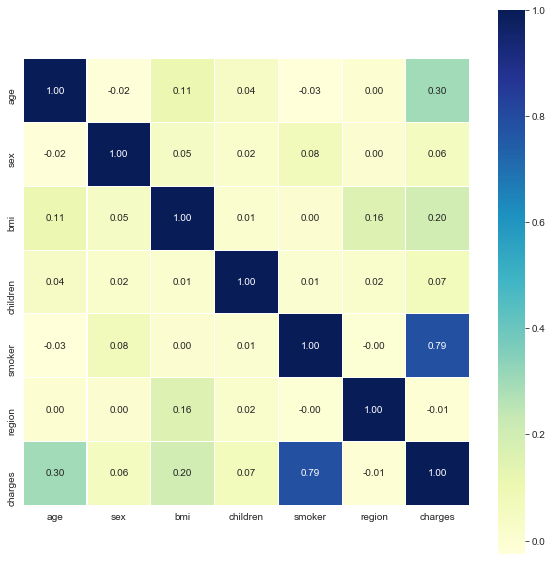

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(insurance_encoded.corr(), annot = True, linewidth = 0.1, cmap="YlGnBu", square = True, fmt = '.2f')
plt.show()

In terms of the Target variable "charges", "smoker" has a high positive correlation of 0.79, "age" has a weak positive correlation of 0.30. Other variables are not well correlated. 

**Inference from the Pair plots, Bivariate plots & Correlation Matrix:**
- We can see a positive correlation between BMI and Charges. We can assume that the overweight/obese is a major factor in overall health of the patient, resulting in higher charges.
- Similarly, we can see that the Insurance Charges for Smokers is more than that for Non-Smokers (understandably)
- In addition, we can also observe that the Charges tend to go up as Age of the customer increases (as age is a major factor for most of the illness).

## 4. Statistical Evidences & Hypothesis Testing

***Do charges of people who smoke differ significantly from the people who don't?***

In [52]:
#Let us check the total number of smokers and non-smokers in the data set
insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

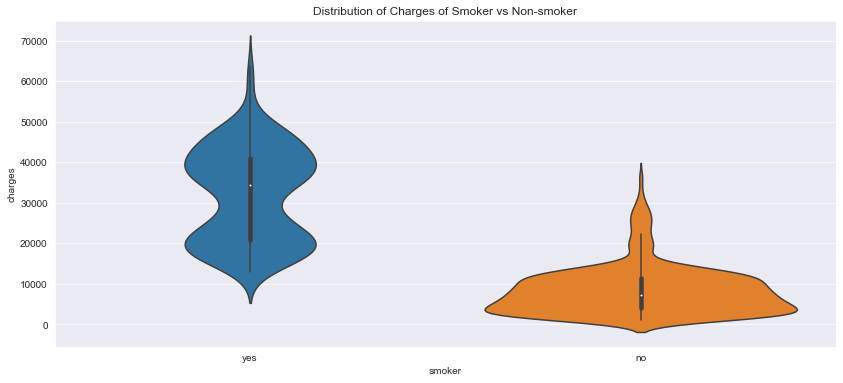

In [53]:
# Distribution of Charges for Smokers vs Non-Smokers
fig = plt.figure(figsize=(14, 6))
sns.violinplot(y = "charges", x = "smoker", data = insurance)
plt.title('Distribution of Charges of Smoker vs Non-smoker')
plt.show()

Visually, it looks like the smokers are having higher Charges than non-smokers. Let us construct out Null and Alternate Hypothesis and validate the assumption.

***Null Hypothesis H0:*** Charges of smokers don't differ significantly as the charges of non-smokers.

***Alternate Hypothesis Ha:*** Charges of smokers is significantly different than that of non-smokers.

***Hypothesis Test    :*** Two sample t-test; 
***Significance Level :*** 5% 

***Condition          :*** If p-value is < 0.05, we fail to reject the Null Hypothesis. Else, we reject the Null Hypothesis.

In [54]:
#Significance Level
alpha = 0.05

#Fetching the Charges samples of smokers and non-smokers

smoker_charges = np.array(insurance[insurance["smoker"]=="yes"].charges) #Smoker
non_smoker_charges = np.array(insurance[insurance["smoker"]=="no"].charges) #Non-Smoker

t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges, axis = 0) #Performing the two-sample independent t-test for both the samples(rows)
print('t-statistic = %.4f, p-value = %.4f' % (t_statistic, p_value))

if p_value < alpha:
  print("We reject H0. Charges of smokers is significantly different from non-smokers")
elif p_value > alpha:
  print("We fail to reject H0. Charges of smokers is not significantly different from non-smokers")

t-statistic = 46.6649, p-value = 0.0000
We reject H0. Charges of smokers is significantly different from non-smokers


***Does bmi of males differ significantly from that of females?***

In [55]:
#Let us check the gender distribution in the data set
insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

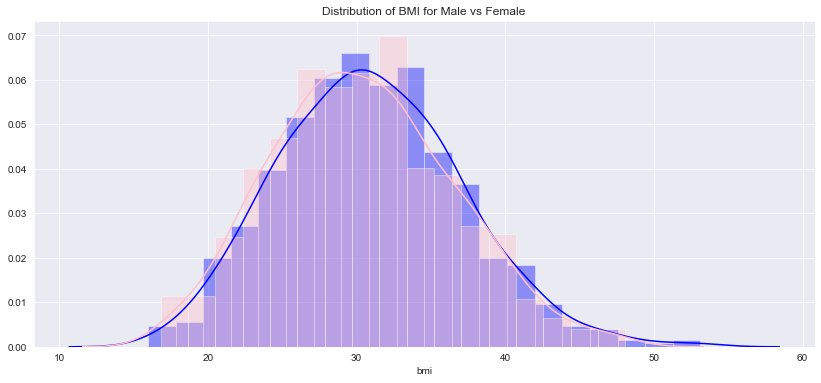

In [56]:
# Distribution of BMI for Male vs Female
fig = plt.figure(figsize=(14, 6))
sns.distplot(insurance[(insurance["sex"] == "male")]["bmi"], color = 'blue')
sns.distplot(insurance[(insurance["sex"] == "female")]["bmi"], color = 'pink')
plt.title('Distribution of BMI for Male vs Female')
plt.show()

Visually, there is no significant difference in BMI across both the genders. Let us validate the assumption with Hypothesis testing.

***Null Hypothesis H0:*** BMI scores of men is not significantly different from those of women.

***Alternate Hypothesis Ha:*** BMI scores of men is significantly different from those of men.

***Hypothesis Test    :*** Two sample t-test; 
***Significance Level :*** 5% 

***Condition          :*** If p-value is < 0.05, we fail to reject the Null Hypothesis. Else, we reject the Null Hypothesis.

In [57]:
#Significance Level
alpha = 0.05

#Fetching the BMI score samples of men and women

bmi_male = np.array(insurance[insurance["sex"]=="male"].bmi) #Male
bmi_female = np.array(insurance[insurance["smoker"]=="no"].bmi) #Female

t_statistic, p_value = ttest_ind(bmi_male, bmi_female, axis = 0) #Performing the two-sample independent t-test for both the samples(rows)
print('t-statistic = %.4f, p-value = %.4f' % (t_statistic, p_value))

if p_value < alpha:
  print("We reject H0. BMI scores of men is significantly different from those of men")
elif p_value > alpha:
  print("We fail to reject H0. BMI scores of men is not significantly different from those of women.")

t-statistic = 0.9740, p-value = 0.3302
We fail to reject H0. BMI scores of men is not significantly different from those of women.


***Is the proportion of smokers significantly different in different genders?***

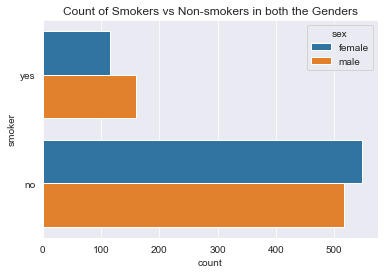

In [58]:
sns.countplot(y = "smoker", hue = "sex", data = insurance).set_title("Count of Smokers vs Non-smokers in both the Genders");

Visually, it looks like the proportion of smokers is different in male and female categories. Let us validate the same with Hypothesis testing. 

***Null Hypothesis H0:*** Proportion of smokers is not significantly different in different genders.

***Alternate Hypothesis Ha:*** Proportion of smokers is significantly different in different genders.

***Hypothesis Test :*** Z-test of Proportions, Chi-square test of independence; ***Significance Level*** : 5%

***Condition :*** If p-value is < 0.05, we fail to reject the Null Hypothesis. Else, we reject the Null Hypothesis.

In [59]:
#Creating the two Proportions for Hypothesis testing

#Male and Female smokers
no_female_smokers = insurance[insurance['sex'] == 'female'].smoker.value_counts()[1]
no_male_smokers = insurance[insurance['sex'] == 'male'].smoker.value_counts()[1]

#Male and Female population
no_females = insurance["sex"].value_counts()[1]
no_males = insurance["sex"].value_counts()[0]

print([no_female_smokers, no_male_smokers] , [no_females, no_males])
print(f' Proportion of smokers in females, males = {round(no_female_smokers/no_females,2)}%, {round(no_male_smokers/no_males,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [60]:
alpha = 0.05 #Significance Level of 5%

z_statistic, p_value = proportions_ztest([no_female_smokers, no_male_smokers] , [no_females, no_males])
print('z-statistic = %.4f, p-value = %.4f' % (z_statistic, p_value))

if p_value < alpha:
  print("We reject H0. Proportion of smokers is significantly different in different genders.")
elif p_value > alpha:
  print("We fail to reject H0. Proportion of smokers is not significantly different in different genders.")


z-statistic = -2.7867, p-value = 0.0053
We reject H0. Proportion of smokers is significantly different in different genders.


Let us validate the same using Chi Square test. This will validate generic assumption of whether smoking-habits have significant impact on genders.

In [61]:
#Preparing the contingency table for smokers, non-smokers in men and women
contingency_table = pd.crosstab(index = insurance["sex"], columns = insurance["smoker"])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [62]:
alpha = 0.05

chi2, p_value, dof, expected =  chi2_contingency(contingency_table)

print('Chi square statistic = %.4f, Z-statistic squared = %.4f, p-value = %.4f' % (chi2, z_statistic**2, p_value))

if p_value < alpha:
  print("We reject H0. Proportion of smokers is significantly different in different genders.")
elif p_value > alpha:
  print("We fail to reject H0. Proportion of smokers is not significantly different in different genders.")


Chi square statistic = 7.3929, Z-statistic squared = 7.7659, p-value = 0.0065
We reject H0. Proportion of smokers is significantly different in different genders.


Here, we can see from both Proportions test and Chi-square test that the proportions are not significantly independent. Therefore, the smoking habits have a significant impact in genders.

***Is the distribution of bmi across women with no children, one child and two children, the same?***

In [63]:
#Number of women with 0, 1, 2, 3, 4 and 5 children
insurance[insurance['sex']=='female']['children'].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

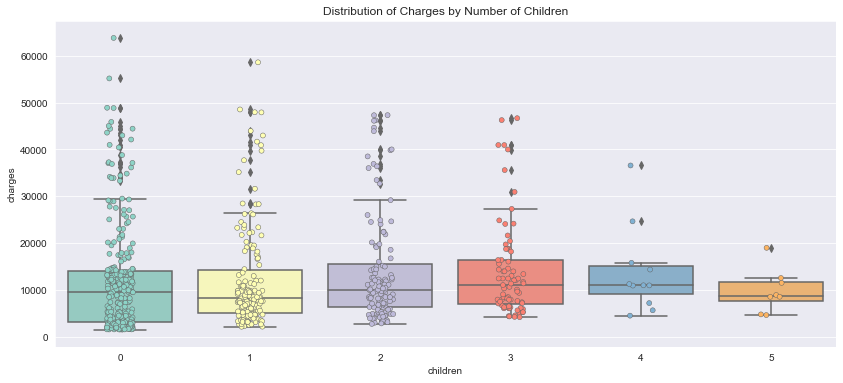

In [64]:
# Boxplot for medical charges by number of children
no_of_children = insurance[insurance['sex']=='female']['children']

fig = plt.figure(figsize = (14, 6))
ax = sns.boxplot(x = no_of_children, y = 'charges', palette = 'Set3', data = insurance)
ax = sns.stripplot(x = no_of_children, y = 'charges', palette = 'Set3', data = insurance, jitter = True, dodge = True, linewidth = 0.5)
plt.title('Distribution of Charges by Number of Children')
plt.show()

- Visually, we are unable to infer anything from the above plot. *Especially, there is no significant difference in BMI scores across women with 0, 1 and 2 children.* Though the number of values for 4 and 5 children categories are sparse, still it is due to the fact that the number of women having 4 or 5 children is very less. 
- Let us check the Hypothesis testing validation results.

***Null Hypothesis H0:*** Distribution of BMI score of women is not significantly different in women with 0, 1 and 2 children. Mean of 0child_sample = Mean of 1child_sample = Mean of 2child_sample

***Alternate Hypothesis Ha:*** Atleast, one of the distributions of BMI score of women with 0, 1 and 2 children is significantly different.

***Hypothesis Test :*** One-way ANOVA; ***Significance Level*** : 5%

**Condition :** If p-value is < 0.05, we fail to reject the Null Hypothesis. Else, we reject the Null Hypothesis.

In [65]:
#Let us identify the different samples

female_insurance_df = insurance[insurance["sex"] == "female"]
no_child_sample = female_insurance_df[female_insurance_df["children"] == 0]["bmi"]
one_child_sample = female_insurance_df[female_insurance_df["children"] == 1]["bmi"]
two_child_sample = female_insurance_df[female_insurance_df["children"] == 2]["bmi"]


In [66]:
alpha = 0.05 #Significance Level

#One-way ANOVA
f_statistic, p_value = f_oneway(no_child_sample,one_child_sample,two_child_sample)

print('F-statistic = %.4f, p-value = %.4f' % (f_statistic, p_value))

if p_value < alpha:
  print("We reject H0. Atleast, one of the distributions of BMI score of women with 0, 1 and 2 children is significantly different.")
elif p_value > alpha:
  print("We fail to reject H0. Distribution of BMI score of women is not significantly different in women with 0, 1 and 2 children.")


F-statistic = 0.3345, p-value = 0.7159
We fail to reject H0. Distribution of BMI score of women is not significantly different in women with 0, 1 and 2 children.


-----------------------------------------It's time to summarize our learnings--------------------------------------------------------------


### SUMMARY

Exploratory Data Analysis including Descriptive Statistics, Univariate and Multivariate Analysis are done on the given Medical charges dataset. 
- It can be observed that there are no missing values present in the data. 

**Univariate Analysis:**
- Distribution of numerical variables such as 'age' and 'bmi' are indicating fairly approximated Normal Distribution. However. 'charges' variable is not normally distributed.
- In line with this, skewness of 'age' and 'bmi' are very minimal, whereas 'Charges' has a positive skewness with long-tail.
- With regards to outliers, Box Plot is used with Inter-Quartile Range(IQR) score to identify the same.'age' did not have any outliers. whereas 'bmi' had very few and 'charges' had approximately 10% of its values outside the 1.5 times IQR Range.
- Most of the customers are having 0,1 or 2 children (dependents). 
- Similarly, qualitative (categorical) variables are also visualised using Countplot (frequency plot). 
   - Both the genders are almost equally distributed in the given sample. 
   - Smoking : Non-smoking population is in the ratio of 1:4 with majority from non-smoking category.
   - Southeast region has slightly more records whereas all other regions have almost equal distribution.
   
**Multivariate Analysis:**
- Pairplot, Box Plot, Strip Plots are used to visualize the multivariate distributions. 
- It can be observed that multiple Gaussians are present in the data set, atleast in terms of Smoking/Non-smoking and Age (Elders vs Young population). 
- Also, Smokers have higher Charges compared to Non-Smokers. 
- Also, Charges tend to increase with increase in age. 
- There isn't significant difference in the distribution of Region and Sex. 

**Statistical Hypothesis Testing:**
For the observations from EDA process, Statistical Hypothesis Testing is performed to validate the hyopthesis (whether statistically significant or not) and below are the inferences. 

- Do charges of people who smoke differ significantly from the people who don't?
  - *Yes, charges of smokers differed significantly from non-smokers in given data.*
- Does bmi of males differ significantly from that of females?
  - *No, Gender has no significant impact on the BMI values.* 
- Is the proportion of smokers significantly different in different genders?
  - *Yes, Proportion of smokers differed significantly in both Male and Female.* 
- Is the distribution of bmi across women with no children, one child and two children, the same?
  - *Distribution of BMI score of women is not significantly different in women with 0, 1 and 2 children.*

## *END OF THE ASSIGNMENT*